In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("./input/jdt.csv")

In [3]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,7,2003/10/10 16:10,1,1,3,0.581676,0.065669,0.021729,690.333333,1,6,36,0.666667,3709,1752.666667,3709,1
1,13,2002/5/14 7:42,1,1,1,0.000000,0.002985,0.008955,670.000000,0,3,0,1.000000,13391,7983.500000,13391,0
2,14,2002/5/13 15:48,1,2,2,0.000000,0.000000,0.000000,34.500000,0,1,7,1.000000,1508,1508.000000,1508,1
3,16,2002/4/5 8:48,1,1,3,0.000000,0.000000,0.000000,0.000000,0,1,458,0.666667,12804,8025.500000,12804,0
4,28,2001/8/24 15:14,1,37,429,0.622239,0.217704,0.266461,170.533800,0,1,835,0.018648,6003,6003.000000,6003,0


In [4]:
X = df.iloc[:, :-1]
X.drop("commitdate", axis =1, inplace=True)
y = df.iloc[:, 16]

In [5]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24770, 15)
(10616, 15)
(24770,)
(10616,)


In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_p_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_lr))

print ("ロジスティック回帰での正答率", accuracy_score(y_test, y_p_lr))
#ロジスティック回帰正答率

ロジスティック回帰の混合行列 [[9068    6]
 [1539    3]]
ロジスティック回帰での正答率 0.8544649585531273


In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)
y_p_svm = svm.predict(X_test)
# 正答率を算出
print('SVMでの正答率', accuracy_score(y_test, y_p_svm))
print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_svm))

SVMでの正答率 0.8463639788997739
ロジスティック回帰の混合行列 [[8924  150]
 [1481   61]]


knnの混合行列 [[8864  210]
 [1440  102]]
knnでの正答率 0.8445742275810098


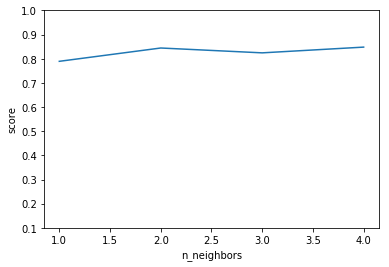

In [9]:
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []
for k in range(1, 5):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    Y_pred = knc.predict(X_test)
    score = knc.score(X_test, y_test)
#     print("[%d] score: {:.2f}".format(score) % k)
    list_nn.append(k)
    list_score.append(score)

#プロット
plt.ylim(0.1, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

#k = 2の時が良い
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train, y_train)
Y_pred = knc.predict(X_test)
score = knc.score(X_test, y_test)
print("knnの混合行列", confusion_matrix(y_test, Y_pred))
print ("knnでの正答率", accuracy_score(y_test, Y_pred))

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

Using TensorFlow backend.


In [11]:
# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Activation, Flatten, Add, Input
# from keras.layers.advanced_activations import LeakyReLU
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization

# lookback = 5

# #データを4次元化
# X_train = X_train.reshape((len(X_train),lookback,1,1))
# X_val = X_val.reshape((len(X_val),lookback,1,1))
# X_test = X_test.reshape((len(X_test),lookback,1,1))

# #CNNの学習
# input_ = Input(shape=(lookback, 1,1))#横の数、縦の数、RGB

# c = Conv2D(8, (3, 1),padding='same',activation='relu')(input_)
# c = Dropout(0.2)(c)
# c = MaxPooling2D(pool_size=(2, 1))(c)

# c = Flatten()(c)
# c = Dense(30,activation='relu')(c)
# c = Dropout(0.2)(c)
# c = Dense(4, activation='softmax')(c)

# model = Model(input_, c)

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# hist = model.fit(X_train, Y_train, batch_size = 10, epochs=100, verbose=1, shuffle=True,
#                  validation_data = (X_val,Y_val))
# #結果描画
# plt.figure()               
# plt.plot(hist.history['val_loss'],label="val_loss")
# plt.plot(hist.history['loss'],label="train_loss")
# plt.legend()
# plt.show()

# plt.figure()               
# plt.plot(hist.history['val_acc'],label="val_acc")
# plt.plot(hist.history['acc'],label="train_acc")
# plt.legend(loc="lower right")
# plt.show()

In [12]:
from __future__ import print_function
 
from keras.models import Model
from keras.utils import np_utils
import numpy as np

import keras 
from keras.callbacks import ReduceLROnPlateau
      
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
  
nb_epochs = 200


#flist = ['Adiac', 'Beef', 'CBF', 'ChlorineConcentration', 'CinC_ECG_torso', 'Coffee', 'Cricket_X', 'Cricket_Y', 'Cricket_Z', 
#'DiatomSizeReduction', 'ECGFiveDays', 'FaceAll', 'FaceFour', 'FacesUCR', '50words', 'FISH', 'Gun_Point', 'Haptics', 
#'InlineSkate', 'ItalyPowerDemand', 'Lighting2', 'Lighting7', 'MALLAT', 'MedicalImages', 'MoteStrain', 'NonInvasiveFatalECG_Thorax1', 
#'NonInvasiveFatalECG_Thorax2', 'OliveOil', 'OSULeaf', 'SonyAIBORobotSurface', 'SonyAIBORobotSurfaceII', 'StarLightCurves', 'SwedishLeaf', 'Symbols', 
#'synthetic_control', 'Trace', 'TwoLeadECG', 'Two_Patterns', 'uWaveGestureLibrary_X', 'uWaveGestureLibrary_Y', 'uWaveGestureLibrary_Z', 'wafer', 'WordsSynonyms', 'yoga']

# flist  = ['Adiac']
# for each in flist:
# fname = each

# x_train, y_train = readucr(fname+'/'+fname+'_TRAIN')
# x_test, y_test = readucr(fname+'/'+fname+'_TEST')
nb_classes = len(np.unique(y_test))
batch_size = min(X_train.shape[0]/10, 16)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

print(X_train.__class__.__name__)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean)/(X_train_std)

X_test = (X_test - X_train_mean)/(X_train_std)
X_train = X_train.reshape(X_train.shape + (1,1,))
X_test = X_test.reshape(X_test.shape + (1,1,))

x = keras.layers.Input(X_train.shape[1:])
#    drop_out = Dropout(0.2)(x)
conv1 = keras.layers.Conv2D(128, 8, 1, border_mode='same')(x)
conv1 = keras.layers.normalization.BatchNormalization()(conv1)
conv1 = keras.layers.Activation('relu')(conv1)

#    drop_out = Dropout(0.2)(conv1)
conv2 = keras.layers.Conv2D(256, 5, 1, border_mode='same')(conv1)
conv2 = keras.layers.normalization.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

#    drop_out = Dropout(0.2)(conv2)
conv3 = keras.layers.Conv2D(128, 3, 1, border_mode='same')(conv2)
conv3 = keras.layers.normalization.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

full = keras.layers.pooling.GlobalAveragePooling2D()(conv3)    
out = keras.layers.Dense(nb_classes, activation='softmax')(full)


model = Model(input=x, output=out)

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=50, min_lr=0.0001) 
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
          verbose=1, validation_data=(X_test, Y_test), callbacks = [reduce_lr])
#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_acc'])


ndarray


/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (8, 1), padding="same")`
/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 1), padding="same")`
/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 1), padding="same")`
/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: The `nb_epoch` argument in `fit` has been renamed 

Train on 24770 samples, validate on 10616 samples
Epoch 1/200
24770/24770 [==============================] - 26s 1ms/step - loss: 0.4136 - acc: 0.8558 - val_loss: 0.4119 - val_acc: 0.8547
Epoch 2/200
24770/24770 [==============================] - 25s 992us/step - loss: 0.4087 - acc: 0.8568 - val_loss: 0.4102 - val_acc: 0.8547
Epoch 3/200
24770/24770 [==============================] - 25s 993us/step - loss: 0.4069 - acc: 0.8568 - val_loss: 0.4116 - val_acc: 0.8547
Epoch 4/200
24770/24770 [==============================] - 25s 1ms/step - loss: 0.4065 - acc: 0.8568 - val_loss: 0.4102 - val_acc: 0.8547
Epoch 5/200
24770/24770 [==============================] - 24s 987us/step - loss: 0.4049 - acc: 0.8568 - val_loss: 0.4155 - val_acc: 0.8547
Epoch 6/200
24770/24770 [==============================] - 24s 977us/step - loss: 0.4038 - acc: 0.8568 - val_loss: 0.4105 - val_acc: 0.8547
Epoch 7/200
24770/24770 [==============================] - 24s 987us/step - loss: 0.4026 - acc: 0.8568 - val_loss:

24770/24770 [==============================] - 38s 2ms/step - loss: 0.3871 - acc: 0.8568 - val_loss: 0.3941 - val_acc: 0.8551
Epoch 60/200
24770/24770 [==============================] - 33s 1ms/step - loss: 0.3867 - acc: 0.8567 - val_loss: 0.4040 - val_acc: 0.8540
Epoch 61/200
24770/24770 [==============================] - 34s 1ms/step - loss: 0.3862 - acc: 0.8571 - val_loss: 0.3892 - val_acc: 0.8551
Epoch 62/200
24770/24770 [==============================] - 37s 1ms/step - loss: 0.3860 - acc: 0.8571 - val_loss: 0.4254 - val_acc: 0.8537
Epoch 63/200
24770/24770 [==============================] - 30s 1ms/step - loss: 0.3866 - acc: 0.8568 - val_loss: 0.3950 - val_acc: 0.8550
Epoch 64/200
24770/24770 [==============================] - 27s 1ms/step - loss: 0.3861 - acc: 0.8568 - val_loss: 0.4310 - val_acc: 0.8527
Epoch 65/200
24770/24770 [==============================] - 28s 1ms/step - loss: 0.3858 - acc: 0.8570 - val_loss: 0.4150 - val_acc: 0.8525
Epoch 66/200
24770/24770 [==============

24770/24770 [==============================] - 34s 1ms/step - loss: 0.3794 - acc: 0.8582 - val_loss: 0.3938 - val_acc: 0.8558
Epoch 118/200
24770/24770 [==============================] - 30s 1ms/step - loss: 0.3798 - acc: 0.8577 - val_loss: 0.4408 - val_acc: 0.8476
Epoch 119/200
24770/24770 [==============================] - 24s 985us/step - loss: 0.3787 - acc: 0.8578 - val_loss: 0.4265 - val_acc: 0.8455
Epoch 120/200
24770/24770 [==============================] - 26s 1ms/step - loss: 0.3789 - acc: 0.8575 - val_loss: 0.4541 - val_acc: 0.8365
Epoch 121/200
24770/24770 [==============================] - 25s 995us/step - loss: 0.3786 - acc: 0.8582 - val_loss: 0.3949 - val_acc: 0.8547
Epoch 122/200
24770/24770 [==============================] - 25s 992us/step - loss: 0.3785 - acc: 0.8581 - val_loss: 0.4805 - val_acc: 0.8234
Epoch 123/200
24770/24770 [==============================] - 25s 998us/step - loss: 0.3791 - acc: 0.8576 - val_loss: 0.8033 - val_acc: 0.4665
Epoch 124/200
24770/24770 

24770/24770 [==============================] - 38s 2ms/step - loss: 0.3731 - acc: 0.8591 - val_loss: 0.6622 - val_acc: 0.6101
Epoch 176/200
24770/24770 [==============================] - 36s 1ms/step - loss: 0.3733 - acc: 0.8584 - val_loss: 0.4367 - val_acc: 0.8419
Epoch 177/200
24770/24770 [==============================] - 38s 2ms/step - loss: 0.3718 - acc: 0.8589 - val_loss: 0.4472 - val_acc: 0.8317
Epoch 178/200
24770/24770 [==============================] - 32s 1ms/step - loss: 0.3716 - acc: 0.8595 - val_loss: 0.6567 - val_acc: 0.6155
Epoch 179/200
24770/24770 [==============================] - 31s 1ms/step - loss: 0.3725 - acc: 0.8585 - val_loss: 0.7048 - val_acc: 0.5686
Epoch 180/200
24770/24770 [==============================] - 34s 1ms/step - loss: 0.3709 - acc: 0.8598 - val_loss: 0.4578 - val_acc: 0.8193
Epoch 181/200
24770/24770 [==============================] - 31s 1ms/step - loss: 0.3716 - acc: 0.8595 - val_loss: 1.1518 - val_acc: 0.2171
Epoch 182/200
24770/24770 [=======